In [ ]:
import tensorflow as tf

In [ ]:
X = tf.range(0, 100, 2)

In [ ]:
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98],
      dtype=int32)>

In [ ]:
y = 2*X + 3

In [ ]:
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([  3,   7,  11,  15,  19,  23,  27,  31,  35,  39,  43,  47,  51,
        55,  59,  63,  67,  71,  75,  79,  83,  87,  91,  95,  99, 103,
       107, 111, 115, 119, 123, 127, 131, 135, 139, 143, 147, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199], dtype=int32)>

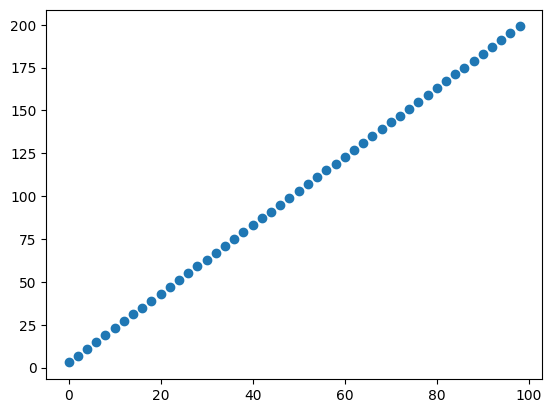

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

## **Model Building**

In [ ]:
# Create Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1, )),
    tf.keras.layers.Dense(1)
])

# Compile the Model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),
              metrics=['mae'])

# Train the Model
model.fit(X, y, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 60.3478 - mae: 60.3478 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 18.1136 - mae: 18.1136
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 18.9871 - mae: 18.9871
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19.0802 - mae: 19.0802
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.8486 - mae: 4.8486
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.0394 - mae: 14.0394
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13.0666 - mae: 13.0666
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.2490 - mae: 4.2490
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.5619 - mae: 7.5619
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.7651 - mae: 5.7651
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.0530 - mae: 4.0530
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8656 - mae: 4.8656
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

In [ ]:
model.predict(tf.constant([150, -10]))  # if x= 150, y = ???

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[293.4974  ],
       [-16.454401]], dtype=float32)

In [ ]:
X = 150
y = 2*X + 3
y

303

In [ ]:
X = -10
y = 2*X + 3
y

-17

## **Save Model using SaveModel Format**

In [ ]:
# As a Save folder
model.export('new_model_1')

Saved artifact at 'new_model_1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_12')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137008854184976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137008854183440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137008854185360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137008854185936: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# As a Save Keras file
model.save('new_model_1.keras')

## **Save model using HDF5 Format**

In [31]:
model.save('new_model_2.h5')

## **Load Model Using SavedModel Format**

In [33]:
import tensorflow as tf
# As a Load Keras file
new_model_1 = tf.keras.models.load_model('new_model_1.keras')

In [34]:
new_model_1.predict(tf.constant([150, -10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[293.4974  ],
       [-16.454401]], dtype=float32)

In [36]:
# As a Load Keras file
new_model_1 = tf.keras.layers.TFSMLayer('new_model_1', call_endpoint='serve')

In [41]:
new_model_1(tf.constant([150.0, -10.0], shape=(2, 1), dtype=tf.float32))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[293.4974  ],
       [-16.454401]], dtype=float32)>

In [55]:
# new_model_1.summary()

AttributeError: 'TFSMLayer' object has no attribute 'summary'

## **Load Model Using HDF5 Format**

In [51]:
import tensorflow as tf
# As a Load Keras file
new_model_2 = tf.keras.models.load_model('new_model_2.h5')

In [53]:
new_model_2.predict(tf.constant([150, -10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


array([[293.4974  ],
       [-16.454401]], dtype=float32)

In [54]:
new_model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)